# Curve Fitting Discussion

Do the following: 
- 1. Plot the data from the file.
    - Note that these are NOT csv files, and thus we need to manually specify the delimiter. you might also need to account for comments / extra metadata in the file. Welcome to data cleaning :) 
    - Include axis labels and a title!
        - Note that the files do not include units :( So I found them already: 
        - HAL1211: ppt (parts per trillion)
        - CH4: ppb (parts per billion)
        - For both, the dates are numerical values corresponding to years.
- 2. Fit the appropriate model to the data. You can use scipy.optimize or numpy.polyfit.
- 3. Calculate the reduced chi-squared value
- 4. Print out the parameters, their errors, the reduced chi-squared value, and the final equation.


You can also find the data sets from here. These are live sets: they are updated frequently, so they looked different when I initially made these problems last year (and contain more data now).
</br></br>Sources: 
- https://gml.noaa.gov/hats/gases/halon1211.html
- https://gml.noaa.gov/ccgg/trends_ch4/

More data if you're interested: 
- https://gml.noaa.gov/hats/data.html

_HAL1211 is Halon 1211, or bromochlorodifluoromethane, used in fire extinguishers. Its manufacture was banned in the 90s, but use as a fire suppresant is still unrestricted.  it is great for putting out fires but it is terrible for the ozone layer._
</br> </br>_CH4 is methane, a very potent greenhouse gas with numerous sources._

In [11]:
import numpy as np
import pandas as pd
import scipy.optimize as fit
import matplotlib.pyplot as plt

In [13]:
CH4 = pd.read_csv("ch4_annmean_gl.csv", skiprows = 43)
CH4

,year,mean,unc
0,1984,1644.68,0.67
1,1985,1657.29,0.59
2,1986,1670.08,0.74
3,1987,1682.70,0.49
4,1988,1693.11,0.67
5,1989,1704.54,0.55
6,1990,1714.42,0.68
7,1991,1724.84,0.72
8,1992,1735.47,0.57
9,1993,1736.49,0.46


,dec_date,HAL1211,HAL1211_sd
0,1992.05191,2.934,0.012
1,1992.12842,2.925,0.024
2,1992.62022,3.018,0.033
3,1992.71311,3.191,0.004
4,1992.90710,3.145,0.106


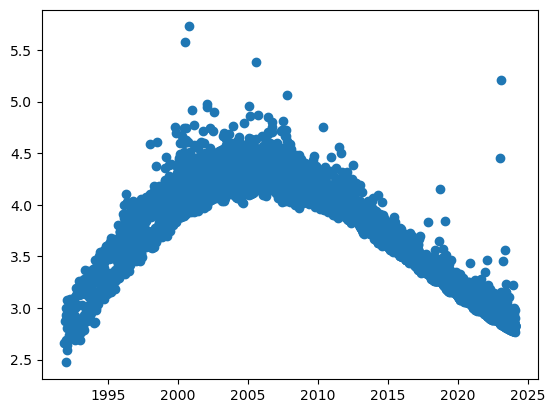

In [19]:
HAL1211 = pd.read_csv('HAL1211_GCMS_flask.txt', sep='\t', skiprows=1)
HAL1211 = HAL1211[["dec_date", "HAL1211","HAL1211_sd"]]
display(HAL1211.head())
plt.figure()
plt.scatter(HAL1211["dec_date"], HAL1211["HAL1211"])

def quad(x, a, b, c):
    return a * x**2 + b * x + c

p0 = [1,1,1]
para , cov = fit.curve_fit(quad, HAL1211["dec_date"], HAL1211["HAL1211"], p0)

HL1211 = HAL1211[HAL1211["HAL1211"] ! = 0.000]

chiH = sum((HAL1211['HAL1211']-quad(HAL1211["dec_date"],para[0],para[1],para[2])/HAL1211)**2)
red_chiH = chiH / (len(HAL1211[HAL1211])-3)
plt.figure()
plt.scatter(HAL1211["dec_date"],HAL1211["HAL12211"])
plt.plot((HAL1211["dec_date"],quad(HAL1211["dec_date"],para[0],para[1],para[2])))